<h1> Parcours de Graphes </h1>

<h4> Pour la suite , on utilisera la classe Graphe ci-dessous par listes d'adjacences </h4>

In [1]:
import networkx
import matplotlib.pyplot as plt


class Graphe:
    def __init__(self):
        self.adj={}
        
    def ajouter_sommet(self,s):
        if s not in self.adj:
            self.adj[s]=[]  # ici on met les sommets adjacents dans une liste
            
    def ajouter_arete(self, s1, s2):
        self.ajouter_sommet(s1)
        self.ajouter_sommet(s2)
        if s2 not in self.adj[s1]:
            self.adj[s1].append(s2)
        if s1 not in self.adj[s2]:
            self.adj[s2].append(s1)
        
    def est_arc(self,s1,s2):
        return s2 in self.adj[s1]
    
    def sommets(self):
        """renvoie la liste des sommmets du graphe"""
        return list(self.adj)
    
    def voisins(self,s):
        """ renvoie la liste des voisins d'un sommet s"""
        return self.adj[s]
    
    def __str__(self): 
        "Affichage du graphe en utilisant le module networkx"
        G = networkx.Graph()
        for s1 in self.sommets():
            for s2 in self.voisins(s1):
                G.add_edge(s1,s2)
        networkx.draw(G, with_labels=True,node_color="skyblue" )  
        return ""
 
            
     


['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
['a', 'd', 'e', 'h']


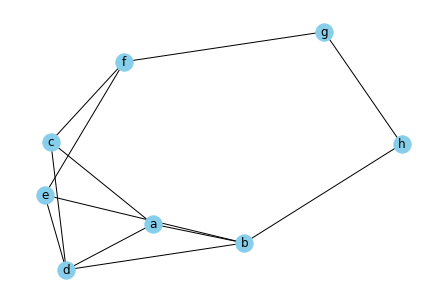

In [2]:
# construction du graphe g1:
g1= Graphe()
g1.ajouter_arete("a","b")
g1.ajouter_arete("a","c")
g1.ajouter_arete("b","d")
g1.ajouter_arete("c","d")
g1.ajouter_arete("b","e")
g1.ajouter_arete("e","f")
g1.ajouter_arete("f","g")
g1.ajouter_arete("f","c")
g1.ajouter_arete("d","a")
g1.ajouter_arete("e","d")
g1.ajouter_arete("g","h")
g1.ajouter_arete("h","b")

print(g1)
print(g1.sommets())
print(g1.voisins("b"))

<h3><li> parcours en largeur </li></h3>


à partir de  a -> ['a', 'b', 'c', 'd', 'e', 'h', 'f', 'g']
à partir de  b -> ['b', 'a', 'd', 'e', 'h', 'c', 'f', 'g']
à partir de  c -> ['c', 'a', 'd', 'f', 'b', 'e', 'g', 'h']
à partir de  d -> ['d', 'b', 'c', 'a', 'e', 'h', 'f', 'g']
à partir de  e -> ['e', 'b', 'f', 'd', 'a', 'h', 'g', 'c']
à partir de  f -> ['f', 'e', 'g', 'c', 'b', 'd', 'h', 'a']
à partir de  g -> ['g', 'f', 'h', 'e', 'c', 'b', 'd', 'a']
à partir de  h -> ['h', 'g', 'b', 'f', 'a', 'd', 'e', 'c']


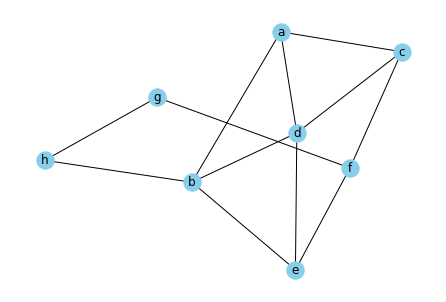

In [3]:
def parcours_en_largeur(g,s_depart):
    """ fonction qui retourne le parcours en largeur du graphe g à partir du sommet s_depart
        entrée :  g type graphe et s_départ chaine de caractère
        sortie : une liste de cahinae de caractère
        précondition : s_depart est un sommet de g"""  
    file = [s_depart]
    visités = []
    while len(file) != 0:
        s = file.pop(0) # on défile 
        if s not in visités:
            visités.append(s)
        for voisin in g.voisins(s):            
            if voisin not in visités and voisin not in file:
                file.append(voisin)
    return visités

#tests
print(g1)
for s in g1.sommets():
    print("à partir de ",s,"->",parcours_en_largeur(g1,s))


<h3> <li> parcours en profondeur </li></h3>

à partir de  a -> ['a', 'd', 'e', 'f', 'g', 'h', 'c', 'b']
à partir de  b -> ['b', 'h', 'g', 'f', 'c', 'e', 'd', 'a']
à partir de  c -> ['c', 'f', 'g', 'h', 'b', 'e', 'd', 'a']
à partir de  d -> ['d', 'e', 'f', 'g', 'h', 'a', 'c', 'b']
à partir de  e -> ['e', 'd', 'a', 'c', 'f', 'g', 'h', 'b']
à partir de  f -> ['f', 'c', 'd', 'b', 'h', 'a', 'g', 'e']
à partir de  g -> ['g', 'h', 'b', 'e', 'd', 'c', 'a', 'f']
à partir de  h -> ['h', 'b', 'e', 'f', 'c', 'd', 'a', 'g']



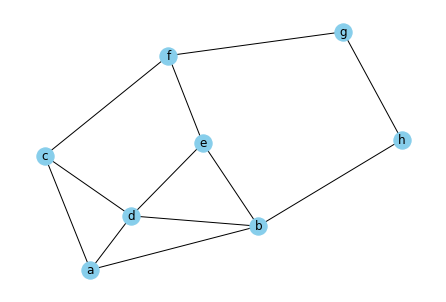

In [4]:
def parcours_en_profondeur(g,s_depart):
    """ fonction qui retourne le parcours en profondeur du graphe g à partir du sommet s_depart
        entrée :  g type graphe et s_départ chaine de caractère
        sortie : une liste de chaine de caractère
        précondition : s_depart est un sommet de g"""
    pile = [s_depart]
    visités = []
    while pile !=[]:
        s = pile.pop()
        if s not in visités:
            visités.append(s)
        for voisin in g.voisins(s):
            if voisin not in visités and voisin not in pile:
                pile.append(voisin)
    return visités

#tests
for sommet in g1.adj:
    print("à partir de ",sommet,'->',parcours_en_profondeur(g1,sommet))
print(g1)

<h3> <li> detection de cycles </li> </h3>
<p> A quel moment dans un parcours sait-on que l'on a un cycle ? </p>

In [5]:
def detection_cycle(g,sommet):
    file = [sommet]
    visités = []
    while len(file) != 0:
        s = file.pop(0)
        if s not in visités:
            visités.append(s)
        else:
            return True
        for voisin in g.voisins(s):            
            if voisin not in visités :
                file.append(voisin)           
    return False
detection_cycle(g1,"c")

True

<h3> bonus 1 <br><li> Trouver un chemin entre deux sommets </li> </h3>
L'idée est d'utiliser une pile qui contient un tuple ( sommet, [une liste] ), <br> ce tuple sera initialisé à (s_depart,[s_depart]) <br> puis ( successeur, [chemin pour arriver au successeur]) <br>
et on s'arrete quand le successeur est s_arrivée.


In [6]:
def unchemin(g,s_depart,s_arrivee):
    
    pile=[(s_depart,[s_depart])]  
    while len(pile)!=0:
        sommet,chemin=pile.pop()
        # voisins=[s for s in g.voisins(sommet) if s not in chemin]
        voisins=[]
        for s in g.voisins(sommet):
            if s not in chemin:
                voisins.append(s)
        
        for successeur in voisins:
            if successeur == s_arrivee:
                return chemin+[successeur]
            else:
                pile.append((successeur,chemin+[successeur]))
        print(pile)
    return None
unchemin(g1,"f","c")

['f', 'c']

<h3> bonus 2 <br> <li> Tous les chemins entre 2 sommets </li> </h3>

In [7]:
def touschemin(g,depart,arrivee):
    pile=[(depart,[depart])]
    TousChem=[]
    while len(pile)!=0:
        sommet,chemin=pile.pop()
        voisins=[s for s in g.voisins(sommet) if s not in chemin]
        for successeur in voisins:
            if successeur == arrivee:
                TousChem.append(chemin+[successeur])
            else:
                pile.append((successeur,chemin+[successeur]))
    return TousChem
touschemin(g1,"g","f")

[['g', 'f'],
 ['g', 'h', 'b', 'e', 'f'],
 ['g', 'h', 'b', 'e', 'd', 'a', 'c', 'f'],
 ['g', 'h', 'b', 'e', 'd', 'c', 'f'],
 ['g', 'h', 'b', 'd', 'e', 'f'],
 ['g', 'h', 'b', 'd', 'a', 'c', 'f'],
 ['g', 'h', 'b', 'd', 'c', 'f'],
 ['g', 'h', 'b', 'a', 'd', 'e', 'f'],
 ['g', 'h', 'b', 'a', 'd', 'c', 'f'],
 ['g', 'h', 'b', 'a', 'c', 'f'],
 ['g', 'h', 'b', 'a', 'c', 'd', 'e', 'f']]

<h3> bonus 2 bis <br> <li> Tous les chemins entre 2 sommets </li> </h3>

In [8]:
def pluscourtchemin(g1,deb,fin):
    T=touschemin(g1,deb,fin)
    pluscourt=[]
    if len(T)!=0:
        mini=len(T[0])
        for i in range(1,len(T)):
            if len(T[i])<mini:
                mini=len(T[i])
        for chemin in T:
            if len(chemin)==mini:
                pluscourt.append(chemin)
    return pluscourt
pluscourtchemin(g1,"g","f")

[['g', 'f']]

<h3> bonus 3 <br> <li> Tous les cycles d'un graphe </li> </h3>

In [9]:
def touslescycles(g):
    TC=[]
    for sommet in g.adj:
        for v in g.voisins(sommet):
            C=touschemin(g,v,sommet)
        for ch in C :
            if len(ch)>2:
                ch=[sommet]+ch
                ch=set(ch) # on transforme en type ensemble 
                if ch not in TC:
                    TC.append(ch)
    return TC
touslescycles(g1)

[{'a', 'c', 'd', 'e', 'f'},
 {'a', 'b', 'd', 'e', 'f', 'g', 'h'},
 {'a', 'b', 'd', 'e'},
 {'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'},
 {'a', 'c', 'd'},
 {'a', 'b', 'c', 'd', 'f', 'g', 'h'},
 {'a', 'b', 'c', 'd', 'e', 'f'},
 {'a', 'b', 'd'},
 {'b', 'c', 'd', 'f', 'g', 'h'},
 {'b', 'c', 'd', 'e', 'f', 'g', 'h'},
 {'a', 'b', 'c', 'f', 'g', 'h'},
 {'b', 'e', 'f', 'g', 'h'},
 {'b', 'd', 'e', 'f', 'g', 'h'},
 {'c', 'd', 'e', 'f'},
 {'b', 'c', 'd', 'e', 'f'},
 {'a', 'b', 'c', 'e', 'f'},
 {'b', 'd', 'e'},
 {'a', 'b', 'c', 'd', 'e'}]